<a href="https://colab.research.google.com/github/ssunwalka01/LIAR-LIAR-Dataset-FAKE_NEWS_Classification/blob/master/11_December2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIAR LIAR Dataset Clasification (Fake-News Analysis)

Let’s look at the steps that we will follow in this course.

- Problem Statement
- Hypothesis Generation
- Getting the system ready and loading the data
- Understanding the data
- Exploratory Data Analysis (EDA)
-    Univariate Analysis
-    Bivariate Analysis
- Missing value and outlier treatment
- Model Building :
-   Naive Bayes
-   Logistic Regression
-   Decision tree
- Cross Validations for every Model

Lets look at each section in detail.

It is a classification problem where we have to predict whether a News Statement would be classified as Fake or Not. In a classification problem, we have to predict discrete values based on a given set of independent variable(s). Classification can be of two types:

- Binary Classification : In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.
- Multiclass Classification : Here we have to classify the data into three or more classes. For example: classifying a movie's genre as comedy, action or romantic, classify fruits as oranges, apples, or pears, etc.

In [0]:
# importing packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [0]:
##################
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#from sklearn.cross_validation import data_test_split
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import nltk
import re
import codecs
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Data

For this practice problem, we have been given three CSV files: data, data and sample submission.

- Train file will be used for dataing the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.
- Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the data data.
- Sample submission file contains the format in which we have to submit our predictions.

- Let's start with loading the data
PS: The data was in 'tsv' format which is then converted into 'csv' format later for analysing purpose.
The Dataset available for the research purpose containg data,test and validation sets.

In [0]:
# converting data, data, and valid datasets into csv format
#data
tsv_file='/content/train.tsv'
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('train_converted.csv',index=False)

In [0]:
#test
tsv_file1='/content/test.tsv'
csv_table1=pd.read_table(tsv_file1,sep='\t')
csv_table1.to_csv('test_converted.csv',index=False)

In [0]:
#valid
tsv_file2='/content/valid.tsv'
csv_table2=pd.read_table(tsv_file2,sep='\t')
csv_table2.to_csv('valid_converted.csv',index=False)

# Reading Data

In [0]:
train=pd.read_csv('/content/train_converted.csv')
test=pd.read_csv('/content/test_converted.csv')
valid=pd.read_csv('/content/valid_converted.csv')

In [244]:
train.columns

Index(['2635.json', 'false',
       'Says the Annies List political group supports third-trimester abortions on demand.',
       'abortion', 'dwayne-bohac', 'State representative', 'Texas',
       'republican', '0', '1', '0.1', '0.2', '0.3', 'a mailer'],
      dtype='object')

In [0]:
# Naming columns
train.columns=["ID","Label","Statement","Subject(s)","Speaker","Speaker's job title","state info","party affiliation","barely true counts","false counts","half true counts","mostly true counts","pants on fire counts","the context (venue/location of speech or statement)"]

In [246]:
train.head()

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [247]:
train.shape

(10239, 14)

In [248]:
test.shape

(1266, 14)

In [249]:
valid.shape

(1283, 14)

In [0]:
# Naming columns 
test.columns=["ID","Label","Statement","Subject(s)","Speaker","Speaker's job title","state info","party affiliation","barely true counts","false counts","half true counts","mostly true counts","pants on fire counts","the context (venue/location of speech or statement)"]

In [0]:
# Naming columns 
valid.columns=["ID","Label","Statement","Subject(s)","Speaker","Speaker's job title","state info","party affiliation","barely true counts","false counts","half true counts","mostly true counts","pants on fire counts","the context (venue/location of speech or statement)"]

Let’s make a copy of data and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.


In [0]:
train_copy=pd.read_csv('train.csv').copy()
test_copy=pd.read_csv('test.csv').copy()
valid_copy=pd.read_csv('valid.csv').copy()

In [0]:
data = pd.concat([train, test, valid])

In [254]:
data.head(10)

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
5,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
6,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
7,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
8,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video
9,7115.json,mostly-true,"For the first time in history, the share of th...",elections,robert-menendez,U.S. Senator,New Jersey,democrat,1.0,3.0,1.0,3.0,0.0,a speech


In [255]:
data.shape

(12788, 14)

In [256]:
data['Label'].unique()

array(['half-true', 'mostly-true', 'false', 'true', 'barely-true',
       'pants-fire'], dtype=object)

Loaded the datasets. Let's move to Univariate Analysis

- Combining data and validation sets here. Later We will use validation techniques

# Univariate Analysis

In [257]:
data['Label'].value_counts(normalize=True)
# Read as percentage after multiplying by 100

half-true      0.205427
false          0.195965
mostly-true    0.191899
barely-true    0.164373
true           0.160463
pants-fire     0.081874
Name: Label, dtype: float64

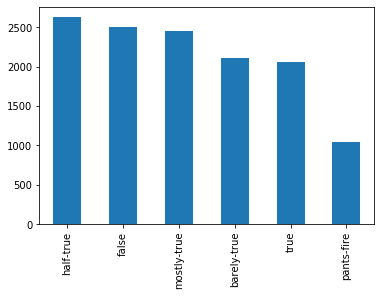

In [258]:
data['Label'].value_counts().plot.bar()

On Looking at the datsets, we identified that there are 3 Data Types:
- Continuous : ID, barely true counts, false counts, half true counts, mostly true counts, pants on fire counts.

- Categorical : Label, Subject(s), Speaker, Speaker's job title, State info, party affiliation, the context (venue/location of speech or statement)

- Text : Statement

Let's go for Continuous Data Type Exploration.
We know that we use BarGraphs for Categorical variable, Histogram or ScatterPlot for continuous variables.

- Continuous Variables

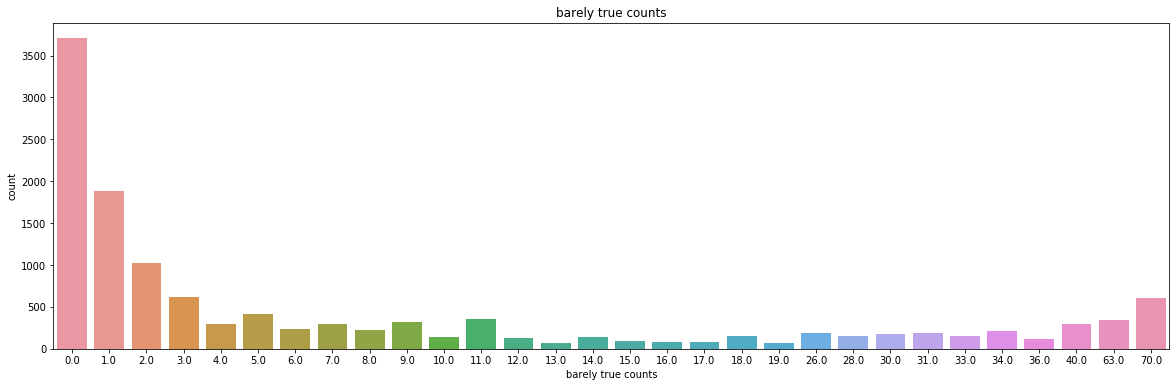

In [259]:
# barely true counts
plt.figure(figsize=(20, 6))
sns.countplot(data["barely true counts"])
plt.title('barely true counts')
plt.show()

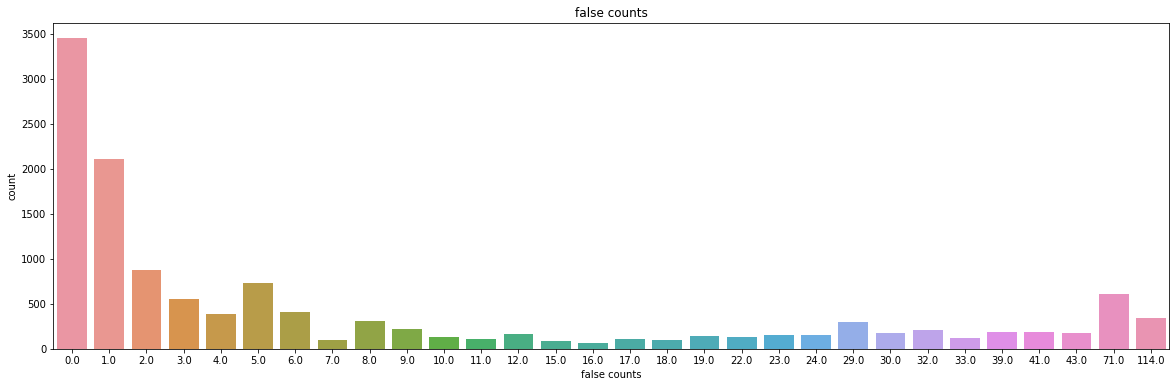

In [260]:
# false counts
plt.figure(figsize=(20, 6))
sns.countplot(data["false counts"])
plt.title('false counts')
plt.show()

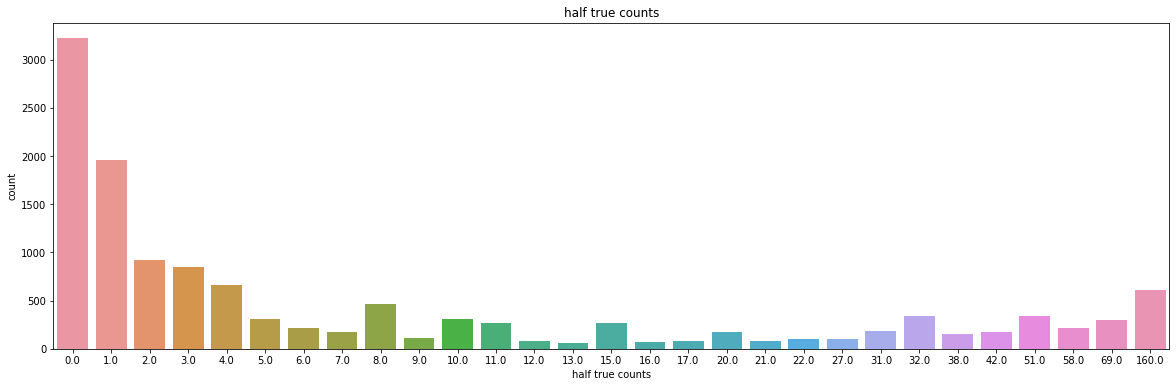

In [261]:
# half true counts
plt.figure(figsize=(20, 6))
sns.countplot(data["half true counts"])
plt.title('half true counts')
plt.show()

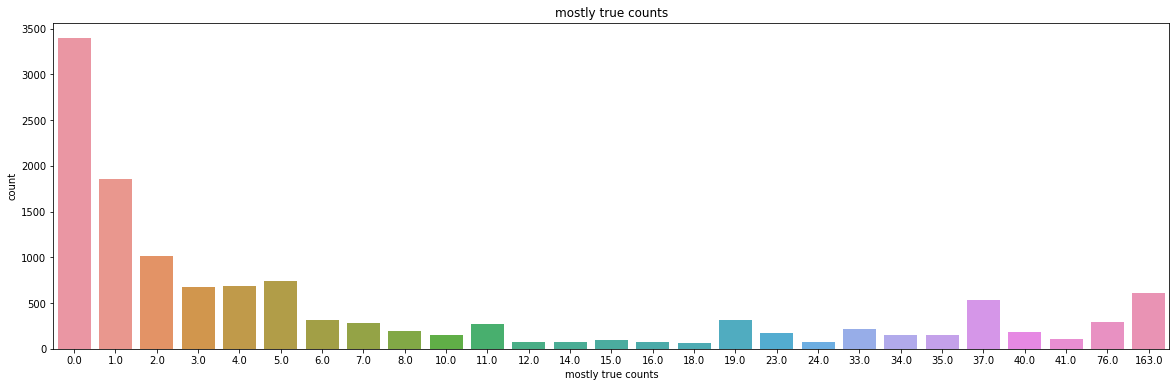

In [262]:
# mostly true counts
plt.figure(figsize=(20, 6))
sns.countplot(data["mostly true counts"])
plt.title('mostly true counts')
plt.show()

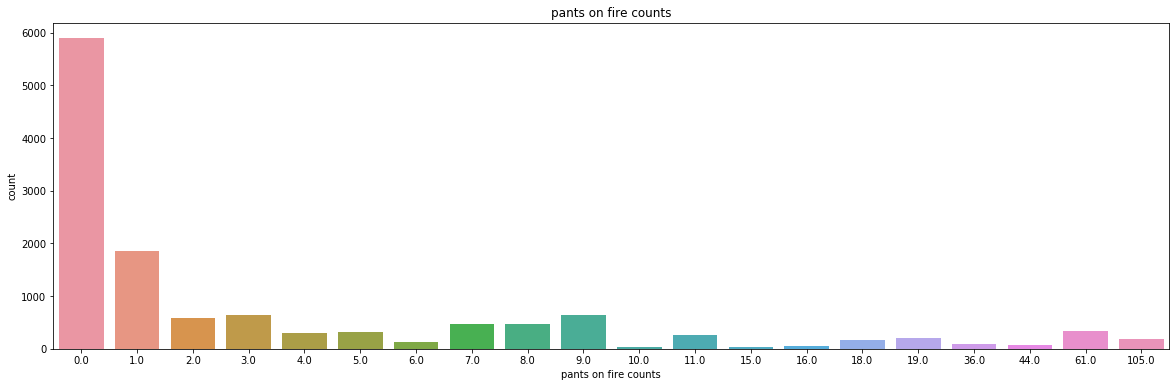

In [263]:
# pants on fire counts 
plt.figure(figsize=(20, 6))
sns.countplot(data["pants on fire counts"])
plt.title('pants on fire counts')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


<Figure size 2160x2160 with 0 Axes>

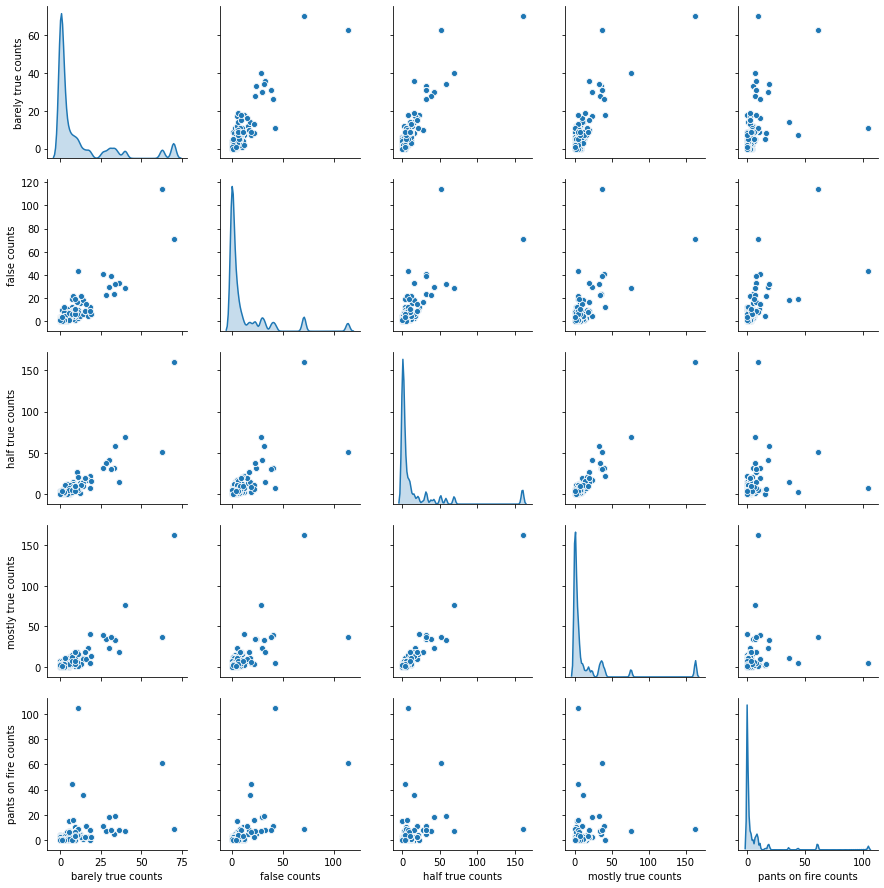

In [264]:
# Pairplot for cross visualisation of continuous variables
plt.figure(figsize=(30,30))
sns.pairplot(data, diag_kind='kde');

- Spread of Target Variable

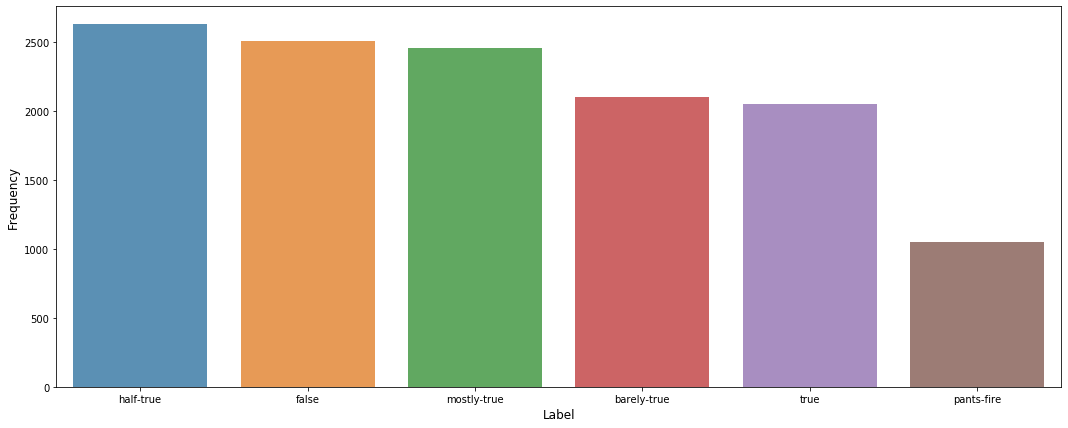

In [265]:
cnt_srs = data['Label'].value_counts()
plt.figure(figsize=(18,7))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

# Data Preprocessing

- Checking Missing Values

In [0]:
def missing_value(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_df = pd.concat([total, percent], axis=1, keys = ['Total', 'Percent'])
    return missing_df

In [267]:
x_data = missing_value(data)
x_data

,Total,Percent
Speaker's job title,3567,27.893338
state info,2749,21.496716
the context (venue/location of speech or statement),131,1.024398
pants on fire counts,2,0.015640
mostly true counts,2,0.015640
half true counts,2,0.015640
false counts,2,0.015640
barely true counts,2,0.015640
party affiliation,2,0.015640
Speaker,2,0.015640


We need to treat the missing values here. It will reduce the model accuracy otherwise.

In [0]:
# Filling Missing Values with Unknown Variable
values = {"Speaker's job title":'Unknown'}
data = data.fillna(value=values)
#valid = valid.fillna(value=values)

In [0]:
# Filling Missing Values with Unknown Variable
values = {"state info":'Unknown1'}
data = data.fillna(value=values)
#valid = valid.fillna(value=values)

In [0]:
data['the context (venue/location of speech or statement)'].fillna(data['the context (venue/location of speech or statement)'].mode()[0], inplace=True)
#valid['the context (venue/location of speech or statement)'].fillna(valid['the context (venue/location of speech or statement)'].mode()[0], inplace=True)

In [0]:
data['pants on fire counts'].fillna(data['pants on fire counts'].median(), inplace=True)
data['mostly true counts'].fillna(data['mostly true counts'].median(), inplace=True)
data['half true counts'].fillna(data['half true counts'].median(), inplace=True)
data['false counts'].fillna(data['false counts'].median(), inplace=True)
data['barely true counts'].fillna(data['barely true counts'].median(), inplace=True)
data['party affiliation'].fillna(data['party affiliation'].mode()[0], inplace=True)
data['Speaker'].fillna(data['Speaker'].mode()[0], inplace=True)
data['Subject(s)'].fillna(data['Subject(s)'].mode()[0], inplace=True)

In [272]:
# Checking again for missing values
y_data = missing_value(data)
y_data

,Total,Percent
the context (venue/location of speech or statement),0,0.0
pants on fire counts,0,0.0
mostly true counts,0,0.0
half true counts,0,0.0
false counts,0,0.0
barely true counts,0,0.0
party affiliation,0,0.0
state info,0,0.0
Speaker's job title,0,0.0
Speaker,0,0.0


- Targeting Statement Column

In [273]:
data.shape

(12788, 14)

In [0]:
#removing non-letter symbols and converting text in 'Statement' to lowercase 
data['Statement'] = data['Statement'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]", '',str(x))))
#valid['Statement'] = valid['Statement'].apply(lambda x: "".join(re.sub(r"[^A-Za-z\s]",'',str(x))))

# lower casing the Text
data['Statement'] = data['Statement'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [0]:
#Removing punctuations
#adding characters list which needs to remove that is PUNCTUATION
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%",'/','<','>','br','�','^','XX','XXXX','xxxx','xx']
#removing extra characters
data['Statement'] = data['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in punc))

In [0]:
import nltk

In [277]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
#removal of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['Statement'] = data['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [0]:
#common words removal
freq_data = pd.Series(' '.join(data['Statement']).split()).value_counts()[:10]
#freq_valid = pd.Series(' '.join(valid['Statement']).split()).value_counts()[:10]

freq_data = list(freq_data.index)
data['Statement'] = data['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_data))
#freq_valid = list(freq_valid.index)
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_valid))

In [0]:
#rare words removal
freq_data_rare = pd.Series(' '.join(data['Statement']).split()).value_counts()[-10:]
freq_data_rare = list(freq_data_rare.index)
data['Statement'] = data['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_data_rare))
#freq_valid_rare = pd.Series(' '.join(valid['Statement']).split()).value_counts()[-10:]
#freq_valid_rare = list(freq_valid_rare.index)
#valid['Statement'] = valid['Statement'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_valid_rare))

In [0]:
#STEMMING
st = PorterStemmer()
data['Statement']=data['Statement'].apply(lambda x: " ".join([st.stem(w) for w in x.split()]))


In [282]:
data.head()

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540.json,half-true,declin coal start start natur ga took start be...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,hillari clinton agre john mccain vote give geo...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,care reform legisl like mandat free sex chang ...,health-care,blog-posting,Unknown,Unknown1,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,econom turnaround start end term,"economy,jobs",charlie-crist,Unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,chicago bear start quarterback last total numb...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [0]:
# Removing .json extension
data['ID'] = data['ID'].str.rstrip('.json')

In [0]:
#ID = data.iloc[:,[1]]
#data=data.drop(['ID'], axis=1)

In [285]:
data.columns

Index(['ID', 'Label', 'Statement', 'Subject(s)', 'Speaker',
       'Speaker's job title', 'state info', 'party affiliation',
       'barely true counts', 'false counts', 'half true counts',
       'mostly true counts', 'pants on fire counts',
       'the context (venue/location of speech or statement)'],
      dtype='object')

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_label = LabelEncoder()

In [0]:
labelencoder_label.fit(data.iloc[:,1].values)
data.iloc[:,1]=labelencoder_label.transform(data.iloc[:,1])

In [288]:
data.head()

,ID,Label,Statement,Subject(s),Speaker,Speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,the context (venue/location of speech or statement)
0,10540,2,declin coal start start natur ga took start be...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324,3,hillari clinton agre john mccain vote give geo...,foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123,1,care reform legisl like mandat free sex chang ...,health-care,blog-posting,Unknown,Unknown1,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028,2,econom turnaround start end term,"economy,jobs",charlie-crist,Unknown,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465,5,chicago bear start quarterback last total numb...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [0]:
# Train test split before by random_seed=fixed


# k-Fold Cross Validation

X = data.iloc[:, [2, 3,4,5,6,7,8,9,10,11,12,13]]
y = data.iloc[:, 1]

In [290]:
y.head()

0    2
1    3
2    1
3    2
4    5
Name: Label, dtype: int64

In [291]:
type(y)

pandas.core.series.Series

In [292]:
print(y.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282],
           dtype='int64', length=12788)


In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [0]:
X_train_1 = X_train
X_test_1 = X_test
y_train_1 = y_train
y_test_1 = y_test

In [295]:
y_train.head()

800     3
486     4
5183    0
6113    3
8387    1
Name: Label, dtype: int64

In [296]:
y_test.head()

634     4
9419    5
2476    0
2064    3
1941    1
Name: Label, dtype: int64

In [0]:
X_train_cat = X_train.loc[:,['Speaker',"Speaker's job title",'state info','party affiliation','the context (venue/location of speech or statement)']]
X_test_cat = X_test.loc[:,['Speaker',"Speaker's job title",'state info','party affiliation','the context (venue/location of speech or statement)']]

In [298]:
X_train_cat.head()

,Speaker,Speaker's job title,state info,party affiliation,the context (venue/location of speech or statement)
800,reader-email,Unknown,Unknown1,none,an email from a reader
486,americanpoliticnews,Unknown,Unknown1,none,Internet sites
5183,rand-paul,Candidate for U.S. Senate and physician,Kentucky,republican,an interview with a New Hampshire radio station
6113,viral-image,Unknown,Unknown1,none,a Facebook post
8387,rick-perry,Governor,Texas,republican,remarks at the Cornerstone Action Dinner in Ma...


In [299]:
X_test_cat.head()

,Speaker,Speaker's job title,state info,party affiliation,the context (venue/location of speech or statement)
634,blog-posting,Unknown,Unknown1,none,a posting on many blogs.
9419,league-women-voters-florida,Unknown,Florida,none,a statement
2476,leticia-van-de-putte,Pharmacist,Texas,democrat,a debate
2064,bill-oreilly,Fox News Channel host,Unknown1,none,"on Fox News' ""The O'Reilly Factor"""
1941,charles-schumer,Senator,New York,democrat,a TV interview


In [300]:
X_train_cat.shape, X_test_cat.shape

((10230, 5), (2558, 5))

In [0]:
X_train_cat = X_train.loc[:,['Speaker',"Speaker's job title",'state info','party affiliation','the context (venue/location of speech or statement)']]
X_test_cat = X_test.loc[:,['Speaker',"Speaker's job title",'state info','party affiliation','the context (venue/location of speech or statement)']]

In [0]:
labelencoder = LabelEncoder()
labelencoder.fit(X_train_cat.iloc[:,0].values)
X_train_cat.iloc[:,0]=labelencoder.transform(X_train_cat.iloc[:,0])

In [0]:
labelencoder.fit(X_test_cat.iloc[:,0].values)
X_test_cat.iloc[:,0]=labelencoder.transform(X_test_cat.iloc[:,0])

In [0]:
labelencoder.fit(X_train_cat.iloc[:,1].values)
X_train_cat.iloc[:,1]=labelencoder.transform(X_train_cat.iloc[:,1])

In [0]:
labelencoder.fit(X_test_cat.iloc[:,1].values)
X_test_cat.iloc[:,1]=labelencoder.transform(X_test_cat.iloc[:,1])

In [0]:
labelencoder.fit(X_train_cat.iloc[:,2].values)
X_train_cat.iloc[:,2]=labelencoder.transform(X_train_cat.iloc[:,2])

In [0]:
labelencoder.fit(X_test_cat.iloc[:,2].values)
X_test_cat.iloc[:,2]=labelencoder.transform(X_test_cat.iloc[:,2])

In [0]:
labelencoder.fit(X_train_cat.iloc[:,3].values)
X_train_cat.iloc[:,3]=labelencoder.transform(X_train_cat.iloc[:,3])

In [0]:
labelencoder.fit(X_test_cat.iloc[:,3].values)
X_test_cat.iloc[:,3]=labelencoder.transform(X_test_cat.iloc[:,3])

In [0]:
labelencoder.fit(X_train_cat.iloc[:,4].values)
X_train_cat.iloc[:,4]=labelencoder.transform(X_train_cat.iloc[:,4])

In [0]:
labelencoder.fit(X_test_cat.iloc[:,4].values)
X_test_cat.iloc[:,4]=labelencoder.transform(X_test_cat.iloc[:,4])

In [312]:
X_train_cat.head()

,Speaker,Speaker's job title,state info,party affiliation,the context (venue/location of speech or statement)
800,2243,952,63,17,2698
486,91,952,63,17,155
5183,2224,122,24,20,3179
6113,2792,952,63,17,374
8387,2299,383,60,20,4023


In [313]:
X_test_cat.head()

,Speaker,Speaker's job title,state info,party affiliation,the context (venue/location of speech or statement)
634,111,395,45,11,514
9419,661,395,10,11,726
2476,667,245,44,4,348
2064,103,148,45,11,1293
1941,174,312,33,4,197


In [0]:
#x = x_data(data)  #data set

In [0]:
#x1 = x_data(data)

In [0]:
#x.shape, x1.shape

In [0]:
X_train_cont = X_train.loc[:,['barely true counts','false counts',"half true counts",'mostly true counts','pants on fire counts']]
X_test_cont = X_test.loc[:,['barely true counts','false counts',"half true counts",'mostly true counts','pants on fire counts']]

In [318]:
X_train_cont.head()

,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts
800,0.0,0.0,0.0,1.0,1.0
486,0.0,0.0,0.0,0.0,1.0
5183,7.0,8.0,10.0,12.0,3.0
6113,5.0,5.0,0.0,3.0,15.0
8387,30.0,30.0,42.0,23.0,18.0


In [319]:
X_test_cont.head()

,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts
634,7.0,19.0,3.0,5.0,44.0
9419,0.0,0.0,0.0,0.0,0.0
2476,2.0,2.0,4.0,1.0,1.0
2064,4.0,6.0,3.0,5.0,1.0
1941,2.0,2.0,2.0,3.0,0.0


In [0]:
X_train_text = X_train.loc[:,['Statement']]
X_test_text = X_test.loc[:,['Statement']]

In [321]:
X_train_text.head()

,Statement
800,atlanta issu increas number citat collect incr...
486,denzel washington support donald trump speak b...
5183,ebola incred contagi transmiss easi catch
6113,number american kill terror last decad number ...
8387,energi effici legisl sponsor us sen jeann shah...


In [322]:
X_test_text.head()

,Statement
634,barack wrote thesi columbia univers critic plu...
9419,us depart homeland secur warn save databas foo...
2476,statehir compani evalu statemand student exam ...
2064,righttowork state much lower level unemploy un...
1941,bridg nowher could occur


In [323]:
y_train.head()

800     3
486     4
5183    0
6113    3
8387    1
Name: Label, dtype: int64

In [324]:
y_test.head()

634     4
9419    5
2476    0
2064    3
1941    1
Name: Label, dtype: int64

In [0]:
#pd.DataFrame(y_data).nunique()

In [0]:
# Converting the Text into list
stat_data_train = X_train_text['Statement'].tolist()
stat_data_test = X_test_text['Statement'].tolist()
#stat_test = test['Statement'].tolist()

# Adding data and test data
lis_stat = stat_data_train + stat_data_test

In [327]:
#Fitting TFIDF on summary
tfv_sum = TfidfVectorizer(max_features=5000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
# Fitting TF-IDF to both dataing and data sets (semi-supervised learning)
tfv_sum.fit(lis_stat)
print(tfv_sum.vocabulary_)
print(tfv_sum.idf_)
xtrain_tfv_sum =  tfv_sum.transform(stat_data_train).toarray()
xtest_tfv_sum = tfv_sum.transform(stat_data_test).toarray()
type(xtrain_tfv_sum)

{'atlanta': 282, 'issu': 2290, 'increas': 2181, 'number': 3027, 'citat': 794, 'collect': 854, 'revenu': 3789, 'sinc': 4098, 'mayor': 2708, 'kasim': 2373, 'reed': 3677, 'took': 4545, 'offic': 3063, 'washington': 4843, 'support': 4376, 'donald': 1320, 'trump': 4628, 'speak': 4201, 'barack': 349, 'ebola': 1399, 'incred': 2183, 'easi': 1392, 'catch': 681, 'american': 166, 'kill': 2397, 'terror': 4477, 'decad': 1130, 'gun': 1942, 'energi': 1461, 'effici': 1409, 'legisl': 2502, 'sponsor': 4224, 'sen': 4005, 'jeann': 2310, 'shaheen': 4040, 'feder': 1625, 'bureaucrat': 589, 'local': 2574, 'build': 575, 'code': 845, 'enforc': 1462, 'citi': 796, 'socal': 4149, 'green': 1912, 'mandat': 2650, 'compli': 891, 'quickli': 3579, 'union': 4704, 'creat': 1037, 'work': 4947, 'day': 1108, 'hour': 2104, 'week': 4872, 'henri': 2022, 'ford': 1713, 'record': 3659, 'marquett': 2677, 'univers': 4707, 'statist': 4268, 'bear': 381, 'time': 4528, 'countri': 1014, 'make': 2640, 'restrict': 3776, 'abort': 16, 'law': 

numpy.ndarray

In [328]:
xtrain_tfv_sum.shape

(10230, 5000)

In [0]:
X_train = np.concatenate((X_train_cont, xtrain_tfv_sum,X_train_cat),axis = 1)
#x_data = np.concatenate((x1, xdata_tfv_sum, rest_df_data),axis = 1)

In [0]:
X_test = np.concatenate((X_test_cont, xtest_tfv_sum,X_test_cat),axis = 1)

In [331]:
X_train.shape, X_test.shape

((10230, 5010), (2558, 5010))

In [332]:
X_train

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 6.300e+01, 1.700e+01,
        2.698e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 6.300e+01, 1.700e+01,
        1.550e+02],
       [7.000e+00, 8.000e+00, 1.000e+01, ..., 2.400e+01, 2.000e+01,
        3.179e+03],
       ...,
       [3.100e+01, 3.900e+01, 3.100e+01, ..., 2.000e+00, 2.000e+01,
        8.600e+01],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.500e+01, 6.000e+00,
        3.250e+03],
       [5.000e+00, 4.000e+00, 2.000e+00, ..., 6.300e+01, 2.000e+01,
        1.860e+03]])

**Fitting the Models on the Preprocessed Dataset**

- **NAIVE BAYES**

In [0]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score #
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

In [335]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5])

In [337]:
np.unique(y_pred_nb)

array([0, 1, 2, 3, 4, 5])

In [0]:
y_pred_nb = labelencoder_label.inverse_transform(y_pred_nb)

In [339]:
y_pred_nb

array(['pants-fire', 'half-true', 'true', ..., 'pants-fire', 'pants-fire',
       'mostly-true'], dtype=object)

In [0]:
y_test_nb = y_test

In [0]:
y_test_nb = labelencoder_label.inverse_transform(y_test_nb)

In [343]:
y_test_nb

array(['pants-fire', 'true', 'barely-true', ..., 'mostly-true', 'false',
       'false'], dtype=object)

In [342]:
print('Accuracy:', accuracy_score(y_test_nb, y_pred_nb))
print('F1 score:', f1_score(y_test_nb, y_pred_nb,average='weighted'))
print('Recall:', recall_score(y_test_nb, y_pred_nb,
                              average='weighted'))
print('Precision:', precision_score(y_test_nb, y_pred_nb,
                                    average='weighted'))
print('\n clasification report:\n', classification_report(y_test_nb, y_pred_nb))
print('\n confussion matrix:\n',confusion_matrix(y_test_nb, y_pred_nb))

Accuracy: 0.23182173573103987
F1 score: 0.22488183103991238
Recall: 0.23182173573103987
Precision: 0.23736069671424564

 clasification report:
               precision    recall  f1-score   support

 barely-true       0.22      0.17      0.19       423
       false       0.27      0.13      0.18       506
   half-true       0.25      0.22      0.23       528
 mostly-true       0.21      0.28      0.24       482
  pants-fire       0.23      0.46      0.30       197
        true       0.24      0.27      0.25       422

    accuracy                           0.23      2558
   macro avg       0.24      0.25      0.23      2558
weighted avg       0.24      0.23      0.22      2558


 confussion matrix:
 [[ 71  38  88 110  58  58]
 [ 72  66  86 104  90  88]
 [ 63  44 117 153  56  95]
 [ 57  39  95 136  56  99]
 [ 20  16  26  22  90  23]
 [ 42  40  61 117  49 113]]


In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test_nb, y_pred_nb)

In [0]:
target_names = ['pants-fire', 'true', 'barely-true', ..., 'mostly-true', 'false',
       'false']

In [0]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

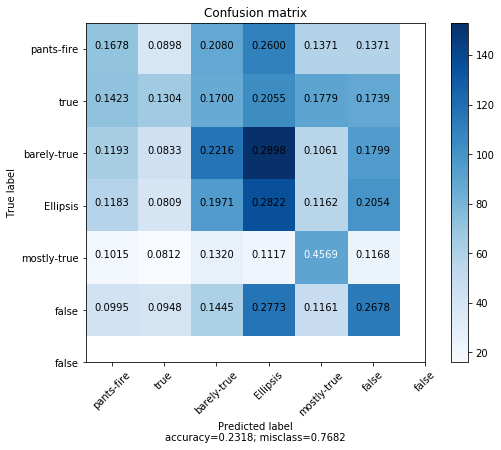

In [361]:
conf = plot_confusion_matrix(cm_nb,
                          target_names,
                          title='Confusion matrix for Naive Bayes',
                          cmap=None,
                          normalize=True)

In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_nb = cross_val_score(estimator = classifier_nb, X = X_train, y = y_train, cv = 10)

In [350]:
print('Mean Absolute Error for Naive Bayes %2f' %(-1 * accuracies_nb.mean()))

Mean Absolute Error for Naive Bayes -0.235389


In [0]:
ans_nb = pd.DataFrame(y_pred_nb)

**Logistic Regression**

In [353]:
from sklearn.linear_model import LogisticRegression
classifier_lr=LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=0,C=10)
classifier_lr.fit(X_train, y_train)
y_pred_lr = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
y_pred_lr = labelencoder_label.inverse_transform(y_pred_lr)

In [0]:
y_test_lr = y_test

In [0]:
y_test_lr = labelencoder_label.inverse_transform(y_test_lr)

In [357]:
print('Accuracy:', accuracy_score(y_test_lr, y_pred_lr))
print('F1 score:', f1_score(y_test_lr, y_pred_lr,average='weighted'))
print('Recall:', recall_score(y_test_lr, y_pred_lr,
                              average='weighted'))
print('Precision:', precision_score(y_test_lr, y_pred_lr,
                                    average='weighted'))
print('\n clasification report:\n', classification_report(y_test_lr, y_pred_lr))
print('\n confussion matrix:\n',confusion_matrix(y_test_lr, y_pred_lr))

Accuracy: 0.23729476153244722
F1 score: 0.17881494755375635
Recall: 0.23729476153244722
Precision: 0.3247238869622144

 clasification report:
               precision    recall  f1-score   support

 barely-true       0.50      0.00      0.01       423
       false       0.22      0.78      0.34       506
   half-true       0.23      0.19      0.21       528
 mostly-true       0.38      0.10      0.15       482
  pants-fire       0.52      0.16      0.25       197
        true       0.24      0.07      0.11       422

    accuracy                           0.24      2558
   macro avg       0.35      0.22      0.18      2558
weighted avg       0.32      0.24      0.18      2558


 confussion matrix:
 [[  2 312  78  11   6  14]
 [  0 394  70  11  13  18]
 [  0 371 102  23   1  31]
 [  0 299 101  46   4  32]
 [  1 140  21   2  32   1]
 [  1 280  76  28   6  31]]


In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test_lr, y_pred_lr)

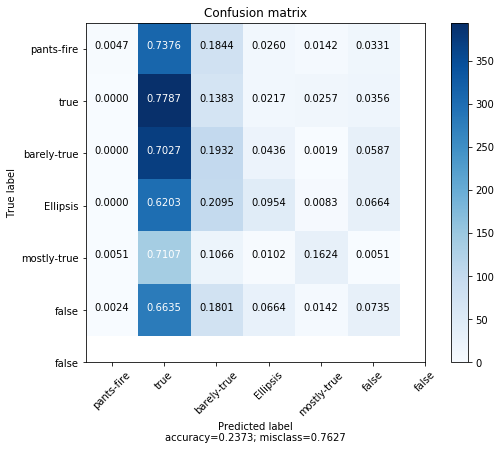

In [363]:
conf_lr = plot_confusion_matrix(cm_lr,
                          target_names,
                          title='Confusion matrix for Logistic Regression',
                          cmap=None,
                          normalize=True)

In [364]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_lr = cross_val_score(estimator = classifier_lr, X = X_train, y = y_train, cv = 10)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local

In [366]:
print('Mean Absolute Error for Logistic Regression %2f' %(-1 * accuracies_lr.mean()))

Mean Absolute Error for Logistic Regression -0.237926


**Decision Tree**

In [0]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [0]:
y_pred_dt = labelencoder_label.inverse_transform(y_pred_dt)

In [0]:
y_test_dt = y_test

In [0]:
y_test_dt = labelencoder_label.inverse_transform(y_test_dt)

In [376]:
print('Accuracy:', accuracy_score(y_test_dt, y_pred_dt))
print('F1 score:', f1_score(y_test_dt, y_pred_dt,average='weighted'))
print('Recall:', recall_score(y_test_dt, y_pred_dt,
                              average='weighted'))
print('Precision:', precision_score(y_test_dt, y_pred_dt,
                                    average='weighted'))
print('\n clasification report:\n', classification_report(y_test_dt, y_pred_dt))
print('\n confussion matrix:\n',confusion_matrix(y_test_dt, y_pred_dt))

Accuracy: 0.37920250195465205
F1 score: 0.37823036970435686
Recall: 0.37920250195465205
Precision: 0.381440402172059

 clasification report:
               precision    recall  f1-score   support

 barely-true       0.41      0.34      0.37       423
       false       0.40      0.38      0.39       506
   half-true       0.40      0.40      0.40       528
 mostly-true       0.35      0.46      0.40       482
  pants-fire       0.44      0.41      0.42       197
        true       0.31      0.29      0.30       422

    accuracy                           0.38      2558
   macro avg       0.39      0.38      0.38      2558
weighted avg       0.38      0.38      0.38      2558


 confussion matrix:
 [[144  54  73  77  25  50]
 [ 54 190  87  86  27  62]
 [ 47  66 210 106  22  77]
 [ 47  72  69 223  13  58]
 [ 19  27  20  27  80  24]
 [ 40  67  64 112  16 123]]


In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test_dt, y_pred_dt)

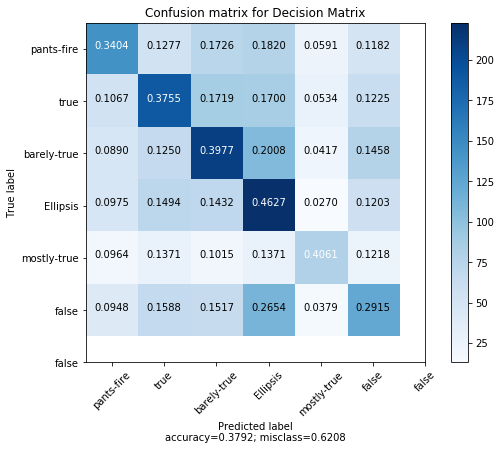

In [380]:
conf_dt = plot_confusion_matrix(cm_dt,
                          target_names,
                          title='Confusion matrix for Decision Matrix',
                          cmap=None,
                          normalize=True)

In [0]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies_dt = cross_val_score(estimator = classifier_dt, X = X_train, y = y_train, cv = 10)

In [382]:
print('Mean Absolute Error for Logistic Regression %2f' %(-1 * accuracies_dt.mean()))

Mean Absolute Error for Logistic Regression -0.373612


**FINISH**